In [19]:
import requests, csv, json, urllib
import pandas as pd
import time
from fake_useragent import UserAgent
from datetime import datetime

BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata/"
START_DATE = '2020-09-19'
END_DATE = '2022-06-02'
ua = UserAgent()

headers = {
   'User-Agent': ua.random,
   }

r = requests.get(BASE_URL + START_DATE, headers = headers)
data = r.json()

fng_data = pd.read_csv('fear-greed.csv', usecols=['Date', 'Fear Greed'])
fng_data['Date'] = pd.to_datetime(fng_data['Date'], format='%Y-%m-%d')  

fng_data.set_index('Date', inplace=True)
missing_dates = []
all_dates = (pd.date_range(fng_data.index[0], END_DATE, freq='D'))
for date in all_dates:
	if date not in fng_data.index:
		missing_dates.append(date)
		#print(date)
		fng_data.loc[date] = [0]
fng_data.sort_index(inplace=True)


for data in ((data['fear_and_greed_historical']['data'])):
	x = int(data['x'])
	x = datetime.fromtimestamp(x / 1000).strftime('%Y-%m-%d')
	y = int(data['y'])
	fng_data.at[x, 'Fear Greed'] = y
#currently any days that do not have data points from cnn are filled with zeros, uncomment the following line to backfill
#fng_data['Fear Greed'].replace(to_replace=0, method='bfill')

fng_data[['Fear Greed']].to_csv('all_fng_csv.csv')

In [15]:
import yfinance as yf

# Define the S&P 500 ticker symbol
ticker = "^GSPC"

# Download historical data for S&P 500
sp500_data = yf.download(ticker, start="2000-01-01", end="2023-12-31")

# Display the first few rows
print(sp500_data.head())

# Save data to CSV
sp500_data[['Close']].to_csv('sp500_data.csv')

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

                Volume  
Date                    
2000-01-03   931800000  
2000-01-04  1009000000  
2000-01-05  1085500000  
2000-01-06  1092300000  
2000-01-07  1225200000  


In [54]:
# Load the two CSV files into pandas DataFrames
df1 = pd.read_csv('sp500_data.csv')
df2 = pd.read_csv('all_fng_csv.csv')

# Convert 'Date' columns to datetime format (important for proper merging)
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Merge the two DataFrames on the 'Date' column using an inner join (keeps only matching dates)
merged_df = pd.merge(df1, df2, on='Date', how='inner')

# Optional: You can also use 'outer' if you want to keep all dates, even if some are missing in one file
# merged_df = pd.merge(df1, df2, on='Date', how='outer')

# Display the merged DataFrame
print(merged_df)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)

# Select rows where 'Date' is after 2023-01-03
merged_df = merged_df[merged_df['Date'] > '2022-01-01']

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

           Date        Close  Fear Greed
0    2011-01-03  1271.869995        68.0
1    2011-01-04  1270.199951        68.0
2    2011-01-05  1276.560059        67.0
3    2011-01-06  1273.849976        64.0
4    2011-01-07  1271.500000        63.0
...         ...          ...         ...
3265 2023-12-22  4754.629883        79.0
3266 2023-12-26  4774.750000        81.0
3267 2023-12-27  4781.580078        81.0
3268 2023-12-28  4783.350098        81.0
3269 2023-12-29  4769.830078        80.0

[3270 rows x 3 columns]


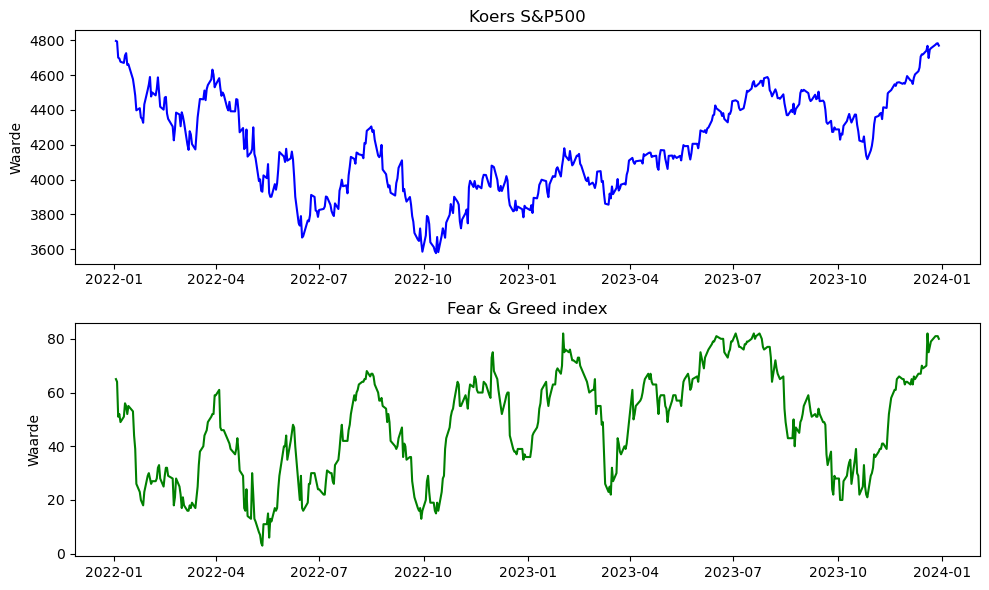

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# Optional: Set 'Date' as the index (useful for time series plotting)
merged_df.set_index('Date', inplace=True)

ax1.plot(merged_df.index, merged_df['Close'], label='Close Price', color='blue')
ax2.plot(merged_df.index, merged_df['Fear Greed'], label='Volume', color='green')

# Adding title and labels
ax1.set_title('Koers S&P500')
ax1.set_ylabel('Waarde')

ax2.set_title('Fear & Greed index')
ax2.set_ylabel('Waarde')


plt.tight_layout()

# Rotating x-axis labels for better readability
# ax1.set_xticks(rotation=45)

plt.show()